# Preprocc

In [200]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, f1

pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('test_ex.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128139 entries, 0 to 128138
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 128139 non-null  int64  
 1   a                  128139 non-null  float64
 2   b                  128139 non-null  float64
 3   c                  128139 non-null  float64
 4   d                  128139 non-null  float64
 5   e                  128139 non-null  float64
 6   f                  128139 non-null  float64
 7   g                  128139 non-null  int64  
 8   h                  128139 non-null  float64
 9   sex                128139 non-null  object 
 10  age                128139 non-null  float64
 11  region             128139 non-null  object 
 12  l                  128139 non-null  int64  
 13  job_title          128139 non-null  object 
 14  education          128139 non-null  object 
 15  marriage           128139 non-null  object 
 16  ch

In [12]:
df.head()

,id,a,b,c,d,e,f,g,h,sex,age,region,l,job_title,education,marriage,children,property,r,employment_status,t,u,v,w,x,target
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,33.750000,a,132,NE employee,Secondary education (plus special education),Married,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,33.250000,b,6,NE employee,Secondary education (plus special education),Married,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,38.583333,c,71,NE employee,Secondary education (plus special education),Divorced/widow,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,61.250000,b,48,Pensioner,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,48.583333,d,48,NE employee,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,No,No,No,No,0


In [13]:
df['id'].duplicated().sum()

38405

In [14]:
df[df.duplicated(keep=False)].sum()

id                     0
a                    0.0
b                    0.0
c                    0.0
d                    0.0
e                    0.0
f                    0.0
g                      0
h                    0.0
sex                    0
age                  0.0
region                 0
l                      0
job_title              0
education              0
marriage               0
children               0
property               0
r                      0
employment_status      0
t                      0
u                      0
v                      0
w                      0
x                      0
target                 0
dtype: object

In [15]:
duplicate_ids = df[df.duplicated(subset=['id'], keep=False)]
uniq_sex = duplicate_ids.groupby('id')['sex'].nunique()
len(uniq_sex[uniq_sex > 1])

18891

Дублирующиеся id намекают на ошибку в данных, полностью дублирующиеся строки отсутствуют, в связи с ограниченной информацией можно предположить что данные взяты из разных баз со своей индексацией

In [16]:
df.isnull().sum()

id                   0
a                    0
b                    0
c                    0
d                    0
e                    0
f                    0
g                    0
h                    0
sex                  0
age                  0
region               0
l                    0
job_title            0
education            0
marriage             0
children             0
property             0
r                    0
employment_status    0
t                    0
u                    0
v                    0
w                    0
x                    0
target               0
dtype: int64

Пропуски в данных отсутствуют

In [17]:
df.nunique()

id                   89734
a                    57903
b                    72096
c                    13053
d                    18049
e                    64150
f                    77932
g                       11
h                       13
sex                      2
age                    528
region                   7
l                      520
job_title                5
education                4
marriage                 4
children                 5
property                 3
r                        2
employment_status        5
t                        2
u                        2
v                        3
w                        2
x                        2
target                   2
dtype: int64

In [18]:
print(df['r'].unique())
print(df['v'].unique())
print(df['x'].unique())
print(df['children'].unique())

['No' 'Yes']
['No' 'Yes' 'Few']
['No' 'Yes']
['2 Two' '1 One' '0 Zero' '3 Three' 'More than 3']


In [19]:
cols = ['r','t','u','w','x']
for col in cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).astype(int)

In [20]:
df['sex'] = df['sex'].map({'Man': 1, 'Woman': 0}).astype(int)

# Analysis

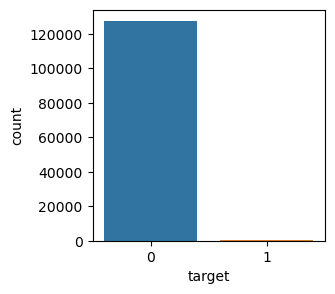

In [21]:
plt.figure(figsize=(3, 3))
sns.countplot(x='target', data=df)
plt.show()

таргет сильно дисбалансирован

In [22]:
df.describe()

,id,a,b,c,d,e,f,g,h,sex,age,l,r,t,u,w,x,target
count,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000,128139.000000
mean,37175.500511,0.167154,0.113162,85.704254,549.108039,1.010326,0.683103,7.872584,0.512201,0.456083,41.109150,103.767659,0.171681,0.839034,0.853378,0.425834,0.385378,0.003808
std,25396.677094,0.152438,0.104964,105.423363,450.407616,0.911425,0.622400,4.768993,0.929954,0.498069,11.137888,100.340082,0.377104,0.367501,0.353730,0.494471,0.486686,0.061595
min,1.000000,0.000002,0.000001,0.000000,49.980000,0.000016,0.000012,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16018.000000,0.065680,0.042822,20.430000,227.030000,0.405678,0.262844,4.000000,0.000000,0.000000,32.000000,29.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,32035.000000,0.118783,0.079422,50.020000,408.490000,0.748943,0.499091,5.000000,0.000000,0.000000,39.916667,70.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,57699.500000,0.219300,0.146658,108.570000,745.730000,1.331874,0.897975,13.000000,0.010000,1.000000,50.000000,144.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,89734.000000,7.067250,0.874025,2682.420000,4999.000000,35.337000,10.352991,24.000000,3.500000,1.000000,64.916667,545.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


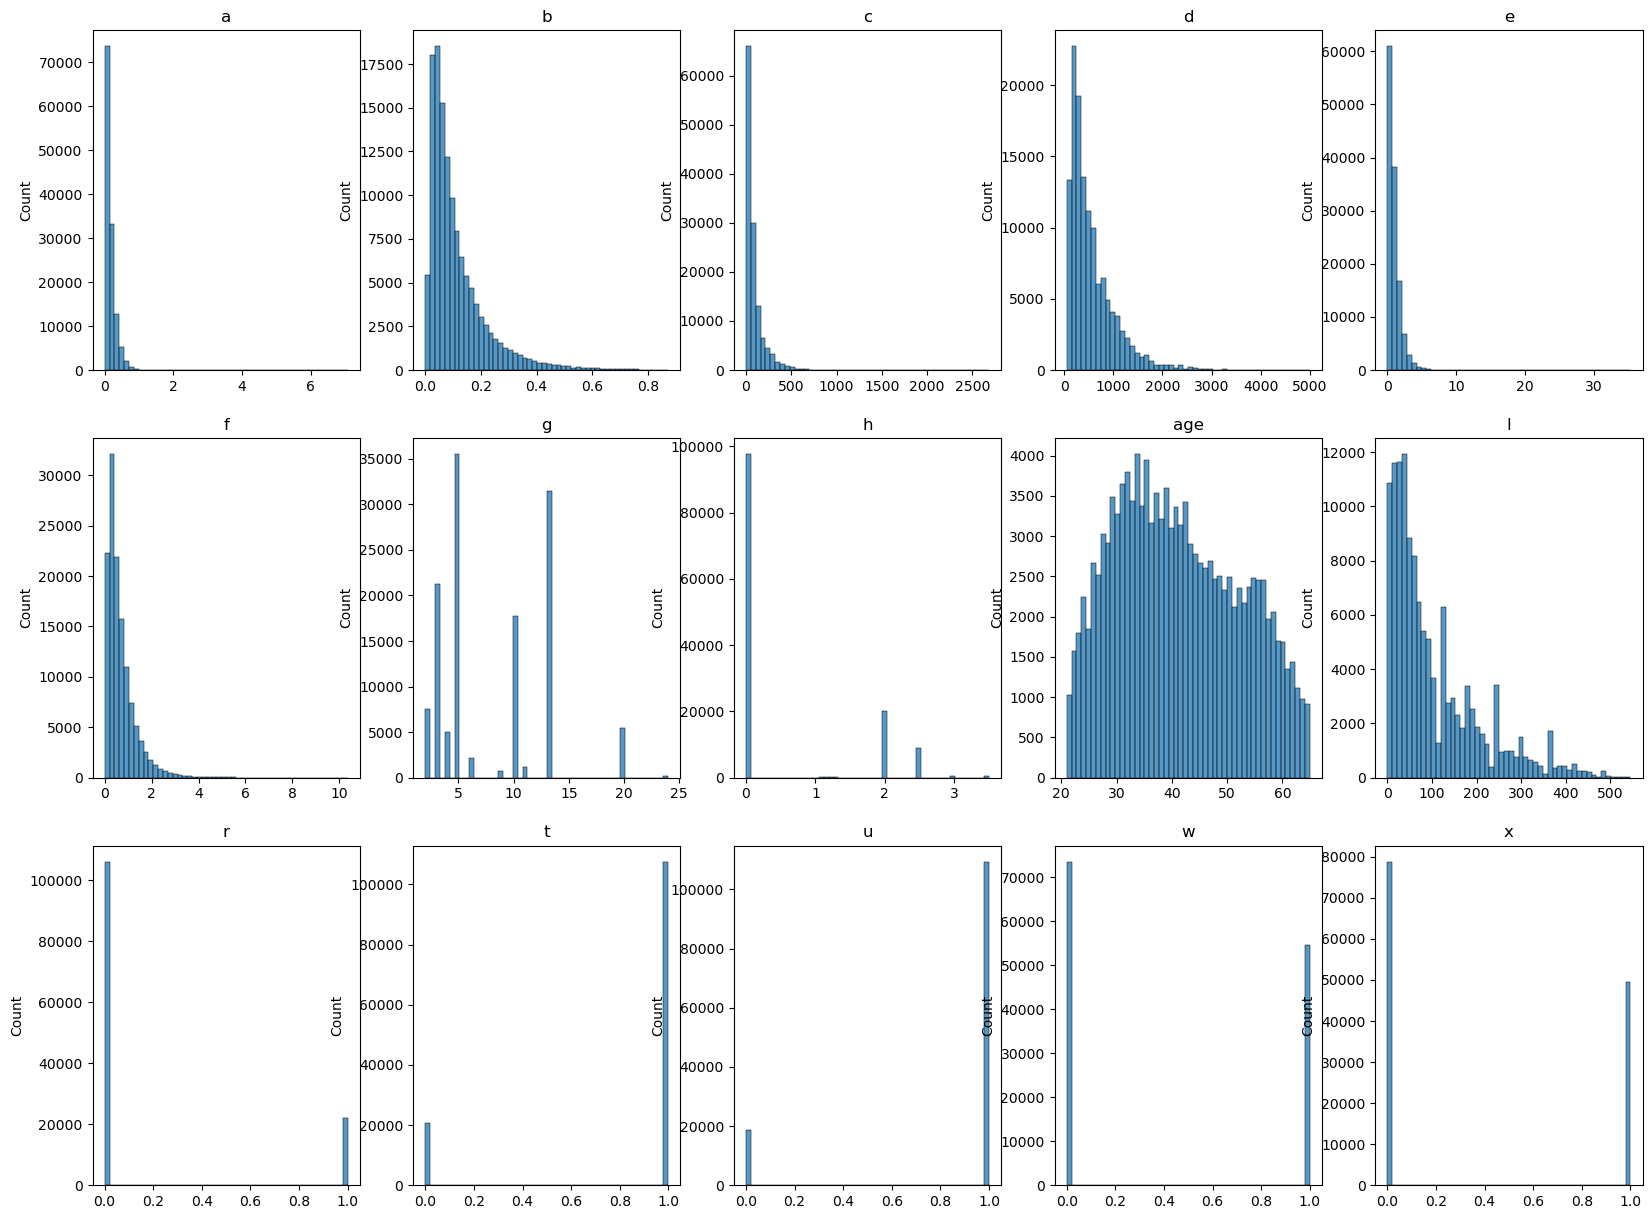

In [23]:
num_cols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'age', 'l', 'r', 't', 'u', 'w', 'x']
fig = plt.figure(figsize = (20, 15))
ax = fig.subplots(3,5).flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=ax[i], bins=50)
    ax[i].set_title(col)
    ax[i].set_xlabel('')
plt.show()

большинство признаков имеют long tail распределение, понадобится очистка от выбросов и нормализация

In [24]:
print(df.select_dtypes(include=['object']).columns.tolist())

['region', 'job_title', 'education', 'marriage', 'children', 'property', 'employment_status', 'v']


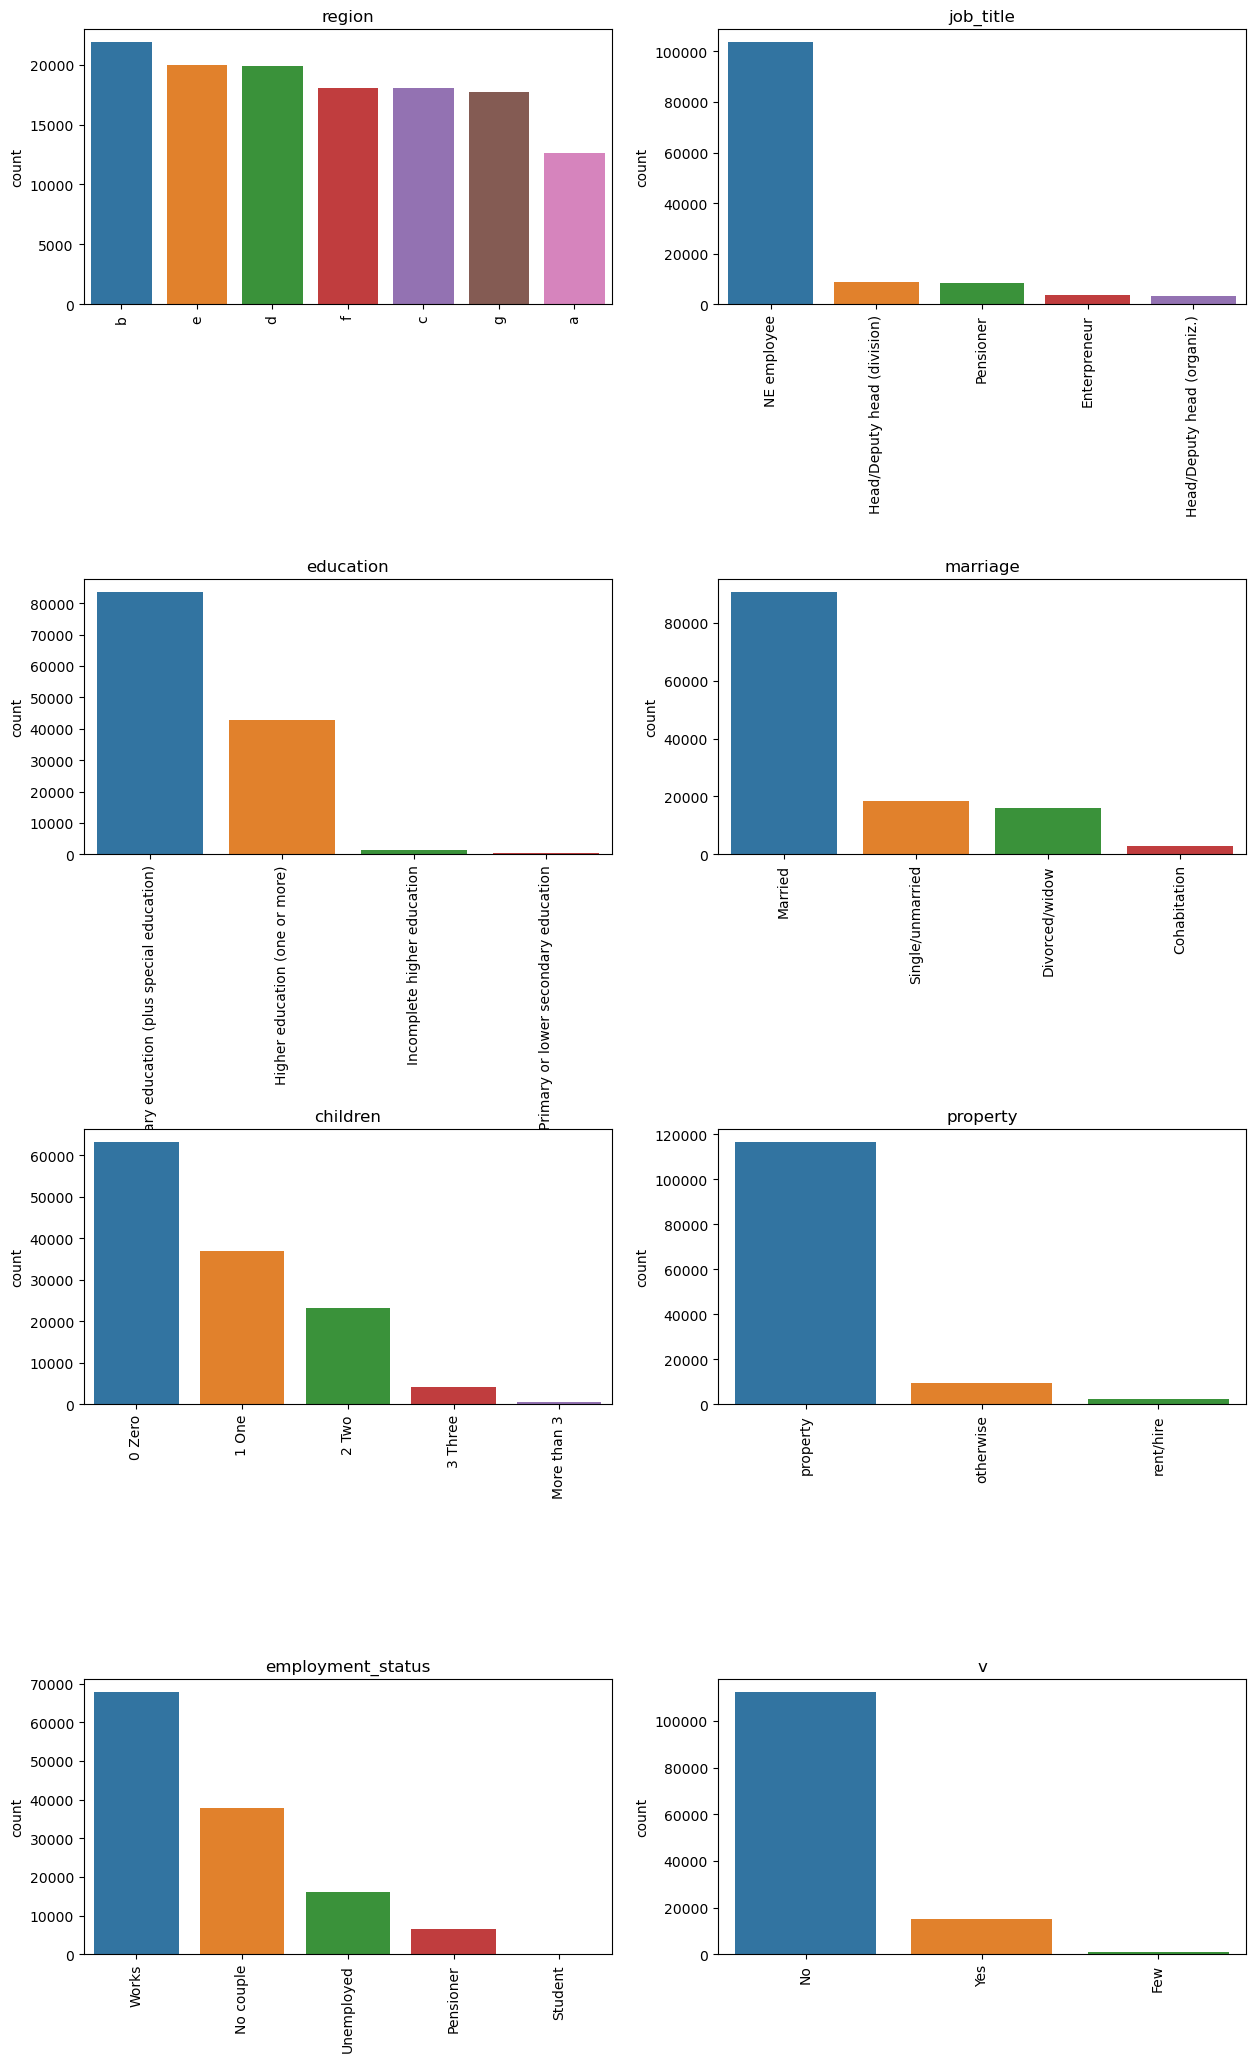

In [25]:
obj_cols = ['region', 'job_title', 'education', 'marriage', 'children', 'property', 'employment_status', 'v']
fig = plt.figure(figsize = (15, 25))
ax = fig.subplots(4,2).flatten()
for i, col in enumerate(obj_cols):
    sns.countplot(x=col, data=df, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', rotation=90)
plt.subplots_adjust(hspace=1)
plt.show()

большинство признаков имеют дисбаланс в категориях

# Feature selection

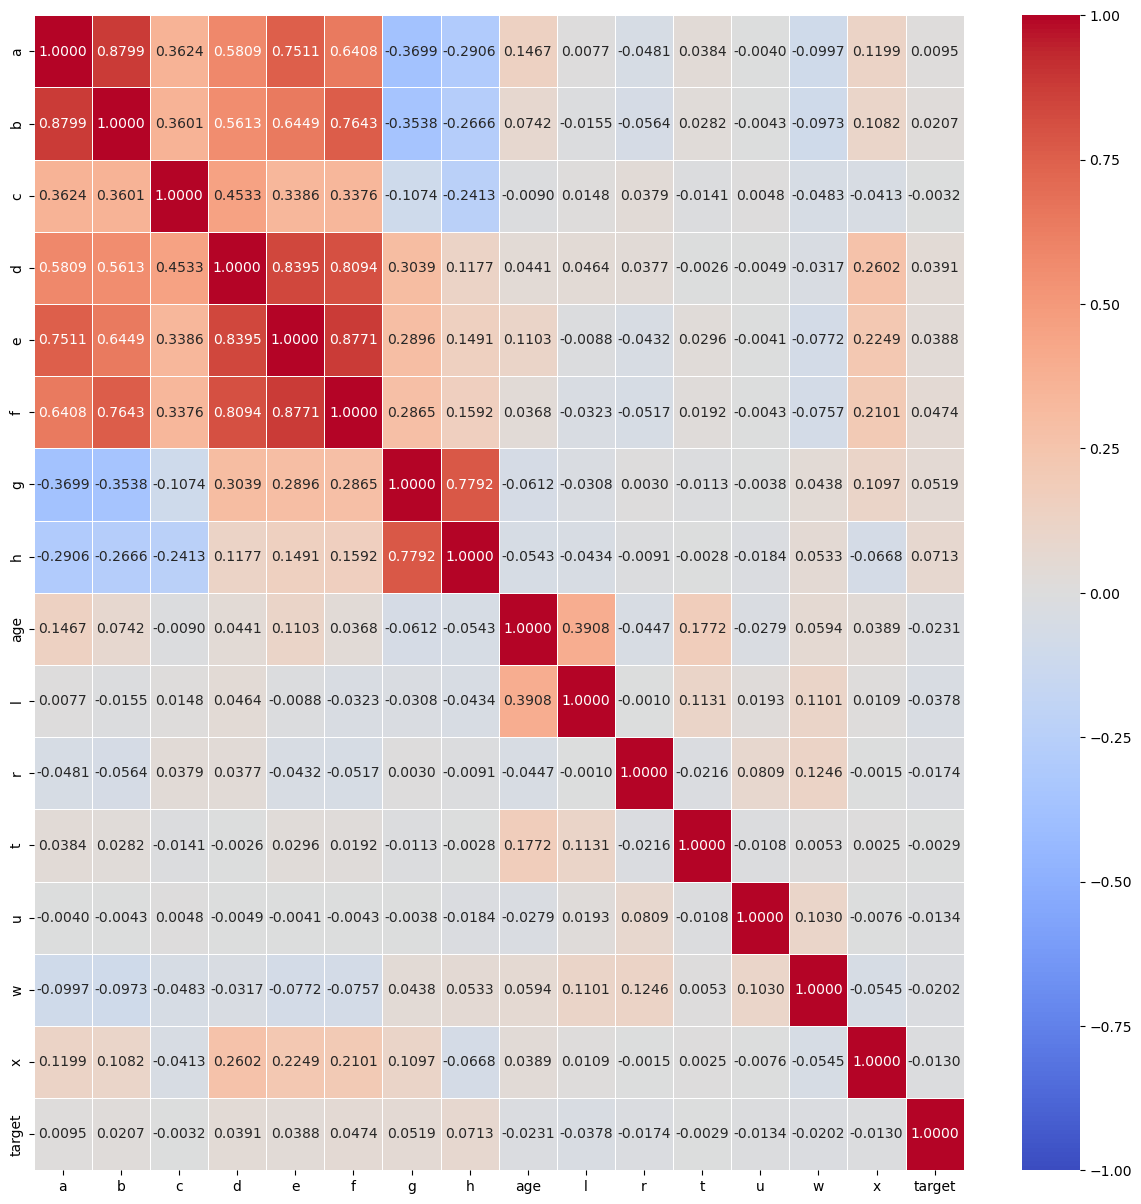

In [26]:
matrix = df[num_cols + ['target']].corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True,  fmt=".4f", cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.show()

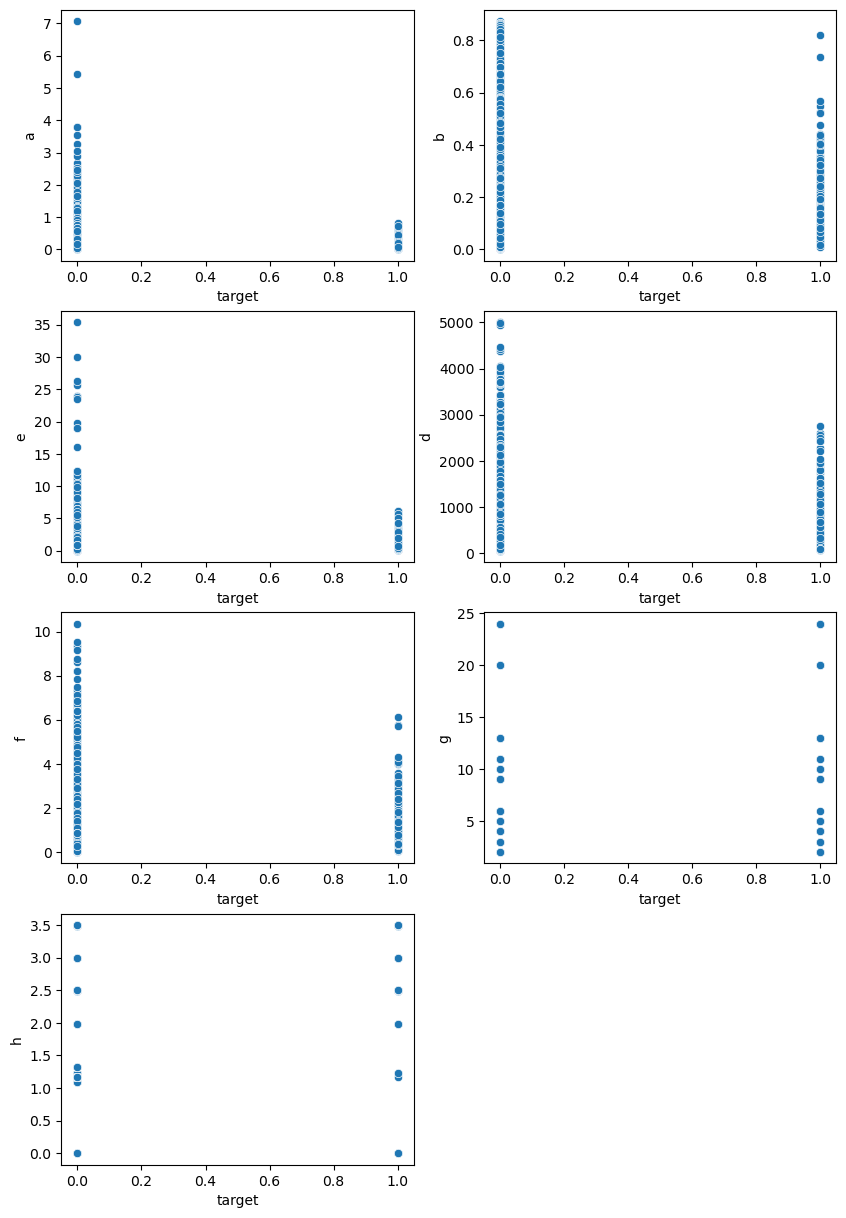

In [27]:
plt.figure(figsize=(10,15))
plt.subplot(4,2,1)
sns.scatterplot(x=df['target'], y=df['a'])
plt.subplot(4,2,2)
sns.scatterplot(x=df['target'], y=df['b'])
plt.subplot(4,2,3)
sns.scatterplot(x=df['target'], y=df['e'])
plt.subplot(4,2,4)
sns.scatterplot(x=df['target'], y=df['d'])
plt.subplot(4,2,5)
sns.scatterplot(x=df['target'], y=df['f'])
plt.subplot(4,2,6)
sns.scatterplot(x=df['target'], y=df['g'])
plt.subplot(4,2,7)
sns.scatterplot(x=df['target'], y=df['h'])
plt.show()

основываясь на кореляции и распределении удаляем признаки

In [28]:
df_clean = df.drop(columns = ['id','a','e','f','h'])

In [29]:
df_clean

,b,c,d,g,sex,age,region,l,job_title,education,marriage,children,property,r,employment_status,t,u,v,w,x,target
0,0.099389,0.00,799.90,13,0,33.750000,a,132,NE employee,Secondary education (plus special education),Married,2 Two,property,0,Works,1,1,No,1,0,0
1,0.021264,49.97,173.03,13,0,33.250000,b,6,NE employee,Secondary education (plus special education),Married,2 Two,otherwise,0,Works,1,1,Yes,1,0,0
2,0.067073,0.00,329.90,13,0,38.583333,c,71,NE employee,Secondary education (plus special education),Divorced/widow,1 One,property,0,No couple,0,1,No,1,0,0
3,0.052700,0.00,235.65,13,0,61.250000,b,48,Pensioner,Secondary education (plus special education),Divorced/widow,0 Zero,property,0,No couple,1,1,Few,1,0,0
4,0.141880,0.00,634.45,13,0,48.583333,d,48,NE employee,Secondary education (plus special education),Divorced/widow,0 Zero,property,0,No couple,1,0,No,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128134,0.237217,44.95,854.05,3,1,51.916667,g,360,NE employee,Secondary education (plus special education),Married,0 Zero,property,0,Works,1,0,No,0,1,0
128135,0.072727,45.86,413.14,13,0,56.000000,b,12,Pensioner,Secondary education (plus special education),Divorced/widow,0 Zero,property,0,No couple,1,1,No,0,1,0
128136,0.095750,57.48,172.42,3,0,25.500000,e,18,NE employee,Higher education (one or more),Single/unmarried,0 Zero,rent/hire,1,No couple,0,1,No,1,1,0
128137,0.042287,422.00,1266.00,20,0,39.000000,b,106,NE employee,Higher education (one or more),Single/unmarried,1 One,property,1,No couple,1,1,No,0,1,0


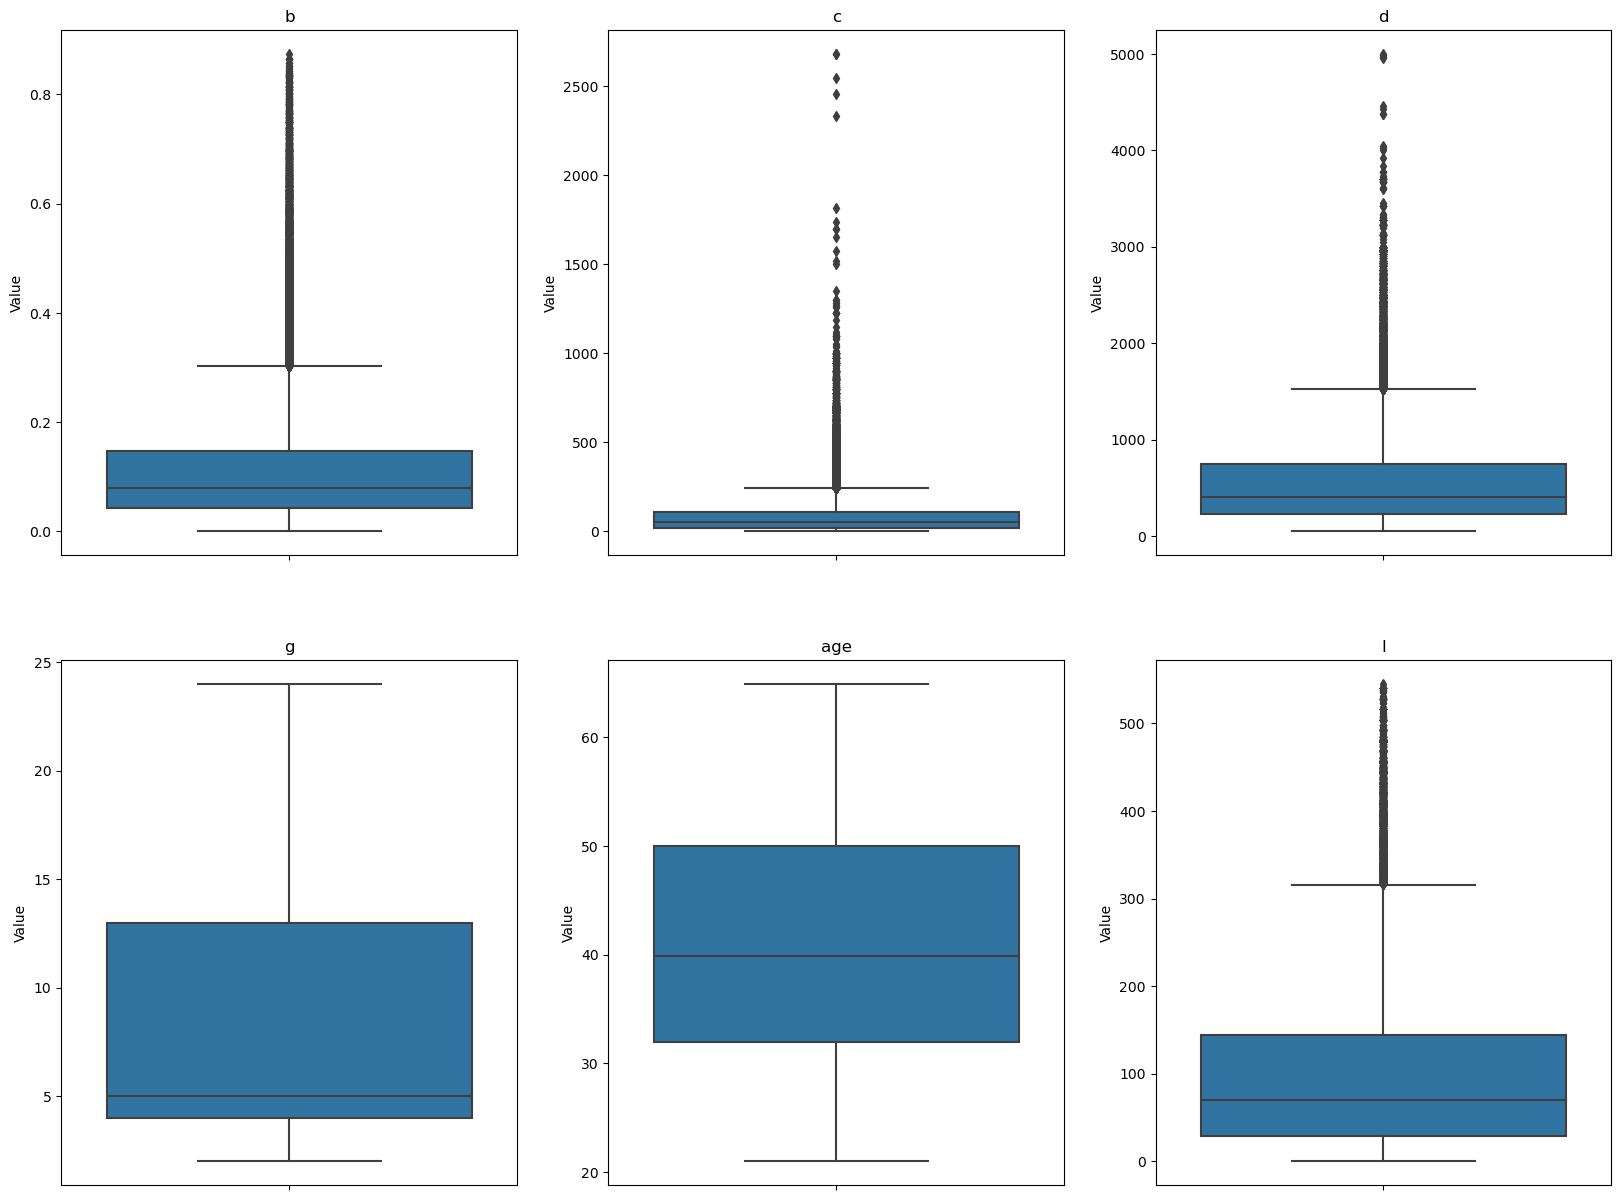

In [30]:
cols= ['b', 'c', 'd', 'g', 'age', 'l']
fig = plt.figure(figsize = (20, 15))
ax = fig.subplots(2,3).flatten()
for i, col in enumerate(cols):
    sns.boxplot(y=df_clean[col], ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_ylabel('Value')
plt.show()

In [31]:
def IQR(df, col):
    df_clean = df.copy()
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= low) & (df_clean[col] <= up)]
    return df_clean   
    

In [32]:
df_clean_out = IQR(df_clean,'l')
df_clean_out = IQR(df_clean_out,'b')
df_clean_out = IQR(df_clean_out,'d')
df_clean_out = IQR(df_clean_out,'c')

In [34]:
df_clean_out.describe()

,b,c,d,g,sex,age,l,r,t,u,w,x,target
count,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000,100087.000000
mean,0.086122,55.658280,419.369280,7.845934,0.462717,40.251227,88.535854,0.171691,0.834474,0.852738,0.436410,0.372436,0.003777
std,0.063921,51.047827,287.251559,4.631766,0.498611,10.832035,77.588394,0.377113,0.371656,0.354369,0.495942,0.483456,0.061339
min,0.000001,0.000000,49.980000,2.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037900,16.720000,198.760000,4.000000,0.000000,31.583333,24.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.066576,40.970000,335.930000,5.000000,0.000000,39.000000,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.117279,78.935000,570.050000,13.000000,1.000000,48.083333,130.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,0.300202,217.490000,1409.830000,24.000000,1.000000,64.916667,316.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model fitting/validation

In [153]:
X = df_clean_out.drop(columns= ['target'])
y = df_clean_out['target']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [154]:
skf = StratifiedKFold(shuffle=True, random_state=21)

In [155]:
scoring = ['balanced_accuracy', 'f1_weighted', 'roc_auc', 'precision_weighted', 'recall_weighted']

In [156]:
dummy = DummyClassifier(strategy='most_frequent')
cv_res = cross_validate(dummy, X_train_val, y_train_val, cv=skf, scoring=scoring)
print(f"Accuracy bal: {cv_res['test_balanced_accuracy'].mean()}")
print(f"F1-weighted: {cv_res['test_f1_weighted'].mean():.4f}")
print(f"ROC-AUC: {cv_res['test_roc_auc'].mean():.4f}") 
print(f"Precision: {cv_res['test_precision_weighted'].mean():.4f}")
print(f"Recall: {cv_res['test_recall_weighted'].mean():.4f}")

Accuracy bal: 0.5
F1-weighted: 0.9943
ROC-AUC: 0.5000
Precision: 0.9924
Recall: 0.9962


In [157]:
dummy = DummyClassifier(strategy='stratified')
cv_res = cross_validate(dummy, X_train_val, y_train_val, cv=skf, scoring=scoring)
print(f"Accuracy bal: {cv_res['test_balanced_accuracy'].mean()}")
print(f"F1-weighted: {cv_res['test_f1_weighted'].mean():.4f}")
print(f"ROC-AUC: {cv_res['test_roc_auc'].mean():.4f}") 
print(f"Precision: {cv_res['test_precision_weighted'].mean():.4f}")
print(f"Recall: {cv_res['test_recall_weighted'].mean():.4f}")

Accuracy bal: 0.4983639637310241
F1-weighted: 0.9927
ROC-AUC: 0.4996
Precision: 0.9924
Recall: 0.9930


In [158]:
minority_class = y.value_counts().idxmin()
dummy_minority = DummyClassifier(strategy='constant', constant=minority_class, random_state=21)
cv_res = cross_validate(dummy, X_train_val, y_train_val, cv=skf, scoring=scoring)
print(f"Accuracy bal: {cv_res['test_balanced_accuracy'].mean()}")
print(f"F1-weighted: {cv_res['test_f1_weighted'].mean():.4f}")
print(f"ROC-AUC: {cv_res['test_roc_auc'].mean():.4f}") 
print(f"Precision: {cv_res['test_precision_weighted'].mean():.4f}")
print(f"Recall: {cv_res['test_recall_weighted'].mean():.4f}")

Accuracy bal: 0.5047565926893101
F1-weighted: 0.9925
ROC-AUC: 0.4982
Precision: 0.9925
Recall: 0.9926


In [159]:
num_cols = ['b', 'c', 'd', 'g', 'age', 'l']
cat_cols = ['region', 'job_title', 'education', 'marriage','children', 'property', 'employment_status', 'v']
bin_cols = ['sex', 'r', 't', 'u', 'w', 'x']

In [143]:
tree_preprocessor = ColumnTransformer(transformers = [('num','passthrough', num_cols),
                                                     ('bin','passthrough', bin_cols),
                                                     ('cat', OneHotEncoder(), cat_cols)])
tree_pipe = Pipeline(steps = [('preprocessor', rf_preprocessor),
                             ('model', model)])

lin_preprocessor = ColumnTransformer(transformers = [('num',Pipeline([('scaler', StandardScaler())]), num_cols),
                                                     ('bin','passthrough', bin_cols),
                                                     ('cat', OneHotEncoder(), cat_cols)])
lin_pipe = Pipeline(steps = [('preprocessor', lin_preprocessor),
                             ('model', model)])

In [144]:
lin_models = {'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=21),
              'SGDClassifier': SGDClassifier(class_weight='balanced', random_state=21),
              #'SVC_lin': SVC(kernel='linear', class_weight='balanced', random_state=21),
              #'SVC_rbf': SVC(kernel='rbf', class_weight='balanced', random_state=21),
              'KNeighbors': KNeighborsClassifier(weights='distance')}
results = []
for model_name, model in lin_models.items():
    print(model_name)
    lin_pipe.set_params(model=model)
    cv_scores = cross_validate(lin_pipe, X_train_val, y_train_val, cv=skf, scoring=['accuracy', 'f1_weighted', 'roc_auc'], n_jobs=-1)
    results.append({'Model': model_name,
                    'Test_ROC_AUC': f"{cv_scores['test_roc_auc'].mean():.4f}",
                    'Test_F1': f"{cv_scores['test_f1_weighted'].mean():.4f}",
                    'Test_Accuracy': f"{cv_scores['test_accuracy'].mean():.4f}",
                    'Test_Std': f"{cv_scores['test_accuracy'].std():.4f}"})

LogisticRegression
SGDClassifier
KNeighbors


In [145]:
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=21)
tree_pipe.set_params(model=dt)
cv_scores = cross_validate(tree_pipe, X_train_val, y_train_val, cv=skf, scoring=['accuracy', 'f1_weighted', 'roc_auc'], n_jobs=-1)
results.append({'Model': 'DecisionTree',
                'Test_ROC_AUC': f"{cv_scores['test_roc_auc'].mean():.4f}",
                'Test_F1': f"{cv_scores['test_f1_weighted'].mean():.4f}",
                'Test_Accuracy': f"{cv_scores['test_accuracy'].mean():.4f}",
                'Test_Std': f"{cv_scores['test_accuracy'].std():.4f}"})

In [146]:
results_df = pd.DataFrame(results)
results_df.sort_values(['Test_ROC_AUC', 'Test_F1', 'Test_Accuracy'], ascending=[False, False, False])

,Model,Test_ROC_AUC,Test_F1,Test_Accuracy,Test_Std
0,LogisticRegression,0.8562,0.8767,0.7862,0.0048
1,SGDClassifier,0.8268,0.8219,0.7090,0.1011
3,DecisionTree,0.7639,0.8809,0.7933,0.0248
2,KNeighbors,0.5436,0.9943,0.9962,0.0000


In [162]:
results_df = pd.DataFrame(results)
results_df.sort_values(['Test_ROC_AUC', 'Test_F1', 'Test_Accuracy'], ascending=[False, False, False])

,Model,Test_ROC_AUC,Test_F1,Test_Accuracy,Test_Std
0,LogisticRegression,0.8562,0.8767,0.7862,0.0048
1,SGDClassifier,0.8268,0.8219,0.7090,0.1011
3,DecisionTree,0.7639,0.8809,0.7933,0.0248
2,KNeighbors,0.5436,0.9943,0.9962,0.0000


In [163]:
param_dist_logreg = {'model__C': np.logspace(-4, 4, 20),
                     'model__penalty': ['l1', 'l2', 'elasticnet'],
                     'model__solver': ['lbfgs', 'sag', 'saga'],
                     'model__l1_ratio': np.linspace(0, 1, 10),
                     'model__class_weight': [None, 'balanced'],
                     'model__max_iter': [500, 1000]}
logreg = LogisticRegression(random_state=21, n_jobs=-1)
lin_pipe.set_params(model=logreg)
logreg_rand = RandomizedSearchCV(estimator=lin_pipe, param_distributions=param_dist_logreg, scoring='f1', cv=3, n_iter=25, n_jobs=-1, random_state=21)
logreg_rand.fit(X_train_val, y_train_val)
logreg_rand.best_params_

{'model__solver': 'lbfgs',
 'model__penalty': 'l2',
 'model__max_iter': 1000,
 'model__l1_ratio': 0.0,
 'model__class_weight': 'balanced',
 'model__C': 0.03359818286283781}

In [221]:
lin_pipe.set_params(**logreg_rand.best_params_)
lin_pipe.fit(X_train_val, y_train_val)
y_pred = lin_pipe.predict(X_test)

In [222]:
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC-AUC: 0.8055

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     19943
           1       0.01      0.83      0.03        75

    accuracy                           0.78     20018
   macro avg       0.51      0.81      0.45     20018
weighted avg       1.00      0.78      0.88     20018


Confusion Matrix:
[[15642  4301]
 [   13    62]]


In [228]:
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC-AUC: 0.8055

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     19943
           1       0.01      0.83      0.03        75

    accuracy                           0.78     20018
   macro avg       0.51      0.81      0.45     20018
weighted avg       1.00      0.78      0.88     20018


Confusion Matrix:
[[15642  4301]
 [   13    62]]


In [229]:
y_pred_proba = lin_pipe.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best = thresholds[np.argmax(f1_scores)]
print(best)

0.8945305730950819


In [230]:
predictions = (probabilities > best).astype(int)
print(f"ROC-AUC: {roc_auc_score(y_test, predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

ROC-AUC: 0.6218

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19943
           1       0.04      0.27      0.07        75

    accuracy                           0.97     20018
   macro avg       0.52      0.62      0.53     20018
weighted avg       0.99      0.97      0.98     20018


Confusion Matrix:
[[19484   459]
 [   55    20]]


In [226]:
logreg_model = lin_pipe.named_steps['model']
cat_encoder = lin_pipe.named_steps['preprocessor'].named_transformers_['cat']
cat_transform = cat_encoder.get_feature_names_out(cat_cols)

coef = pd.DataFrame({'feature': list(num_cols) + list(bin_cols) + list(cat_transform),
                     'coefficient': logreg_model.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print(coef)

                                              feature  coefficient
3                                                   g     0.877687
10                                                  w    -0.761876
24           education_Higher education (one or more)    -0.674443
5                                                   l    -0.670041
11                                                  x    -0.662885
22                              job_title_NE employee    -0.593286
26     education_Primary or lower secondary education     0.564791
6                                                 sex     0.552341
2                                                   d     0.532637
27  education_Secondary education (plus special ed...     0.528130
7                                                   r    -0.527676
19                             job_title_Enterpreneur     0.514521
40                        employment_status_No couple     0.493076
30                                   marriage_Married    -0.48

In [232]:
(X['job_title'] == 'NE employee').sum()

81688

модель находит 27% дефолтов и 2,3% ложноположительных предсказаний 